In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
train=pd.read_csv(next(iter(files.upload().keys())))

Saving cardio.csv to cardio.csv


In [ ]:
train.isnull().any(axis=1).sum()

463

In [ ]:
train['sex'].replace({'F':0,'M':1},inplace=True)
train['is_smoking'].replace({'YES':0,'NO':1},inplace=True)

In [ ]:
# @title info

def describe(df):
  desc=pd.DataFrame()
  desc['dtype']=df.dtypes
  desc['null']=df.isnull().sum()
  desc['%null'] = desc['null'] / len(df) * 100
  desc = pd.concat([desc,df.describe(include = 'all').T],axis=1).sort_values(by='null',ascending=False)
  desc['count']=df.count()
  desc['unique']=df.nunique()
  display(desc)
describe(train)

,dtype,null,%null,count,mean,std,min,25%,50%,75%,max,unique
glucose,float64,304,8.967552,3086,82.086520,24.244753,40.00,71.00,78.00,87.00,394.0,132
education,float64,87,2.566372,3303,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0,4
BPMeds,float64,44,1.297935,3346,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0,2
totChol,float64,38,1.120944,3352,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0,240
cigsPerDay,float64,22,0.648968,3368,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0,32
BMI,float64,14,0.412979,3376,25.794964,4.115449,15.96,23.02,25.38,28.04,56.8,1259
heartRate,float64,1,0.029499,3389,75.977279,11.971868,45.00,68.00,75.00,83.00,143.0,68
id,int64,0,0.000000,3390,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0,3390
diaBP,float64,0,0.000000,3390,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5,142
sysBP,float64,0,0.000000,3390,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0,226


In [ ]:
train = train.fillna(train.median())


In [ ]:
# @title finding categorical & continous feature
def cat_fea(train):


  unique_counts = train.nunique()
  #Threshold to distinguish continous and categorical
  threshold = 12
  continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
  categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
  return continuous_vars,categorical_vars


cont,cat=cat_fea(train.select_dtypes(exclude=['object']))



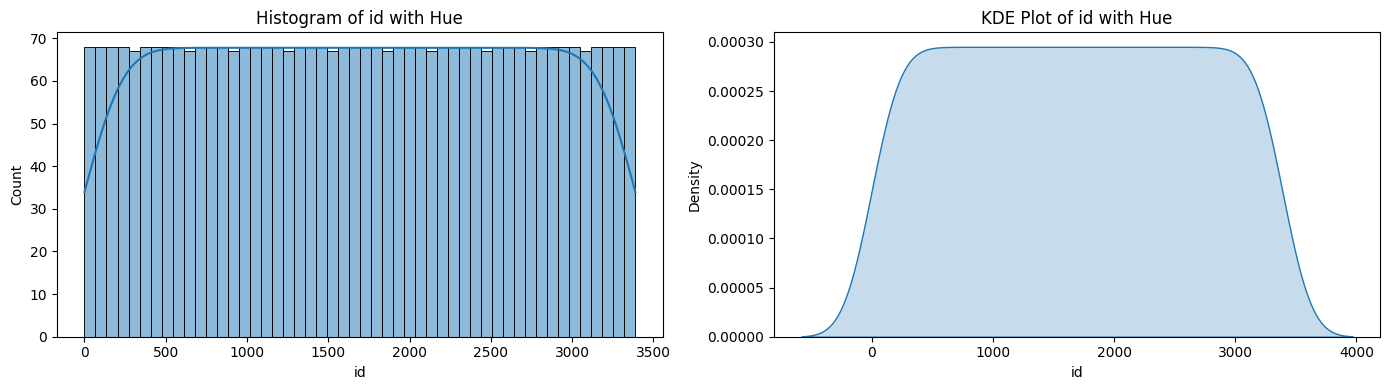

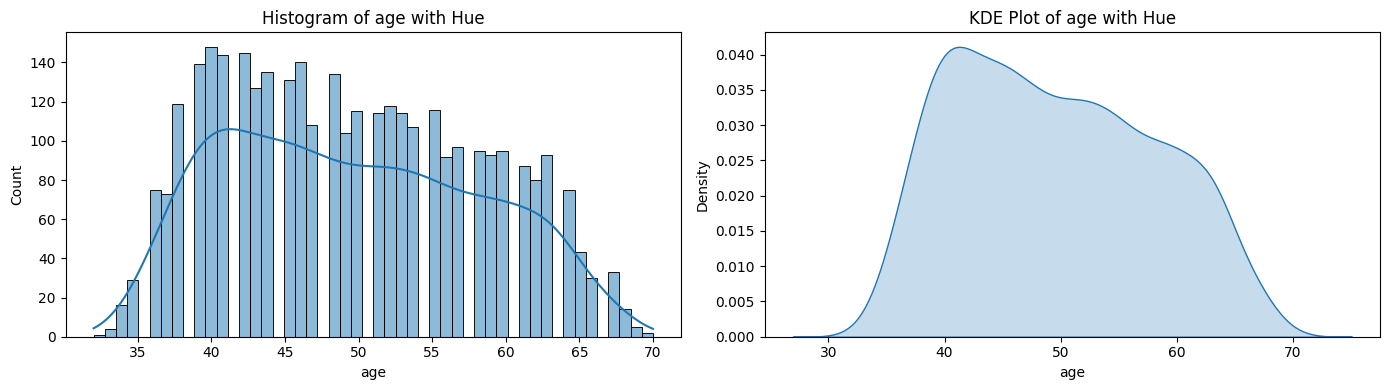

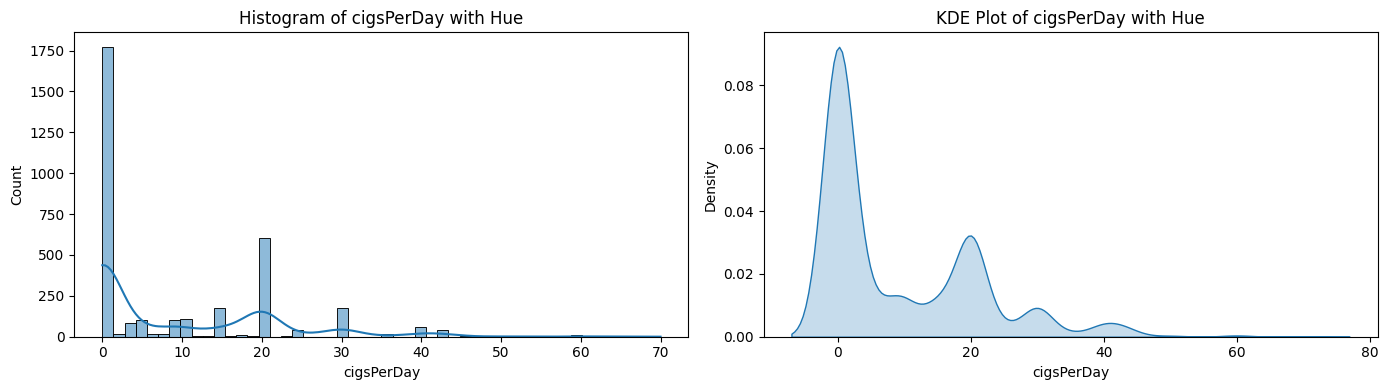

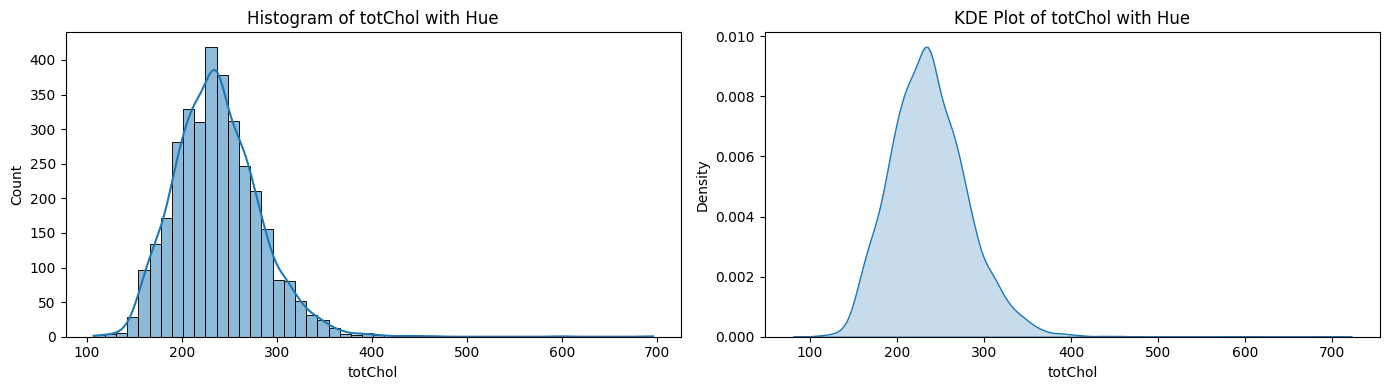

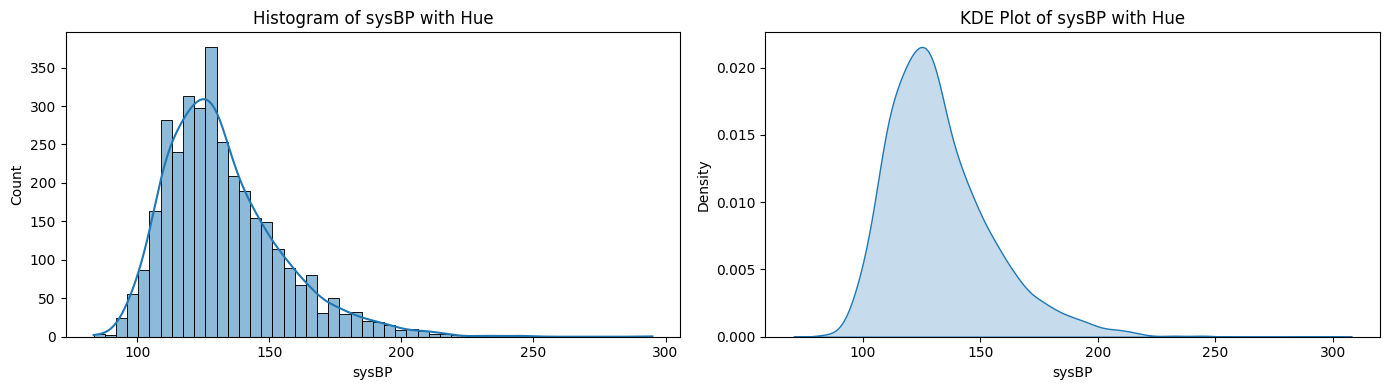

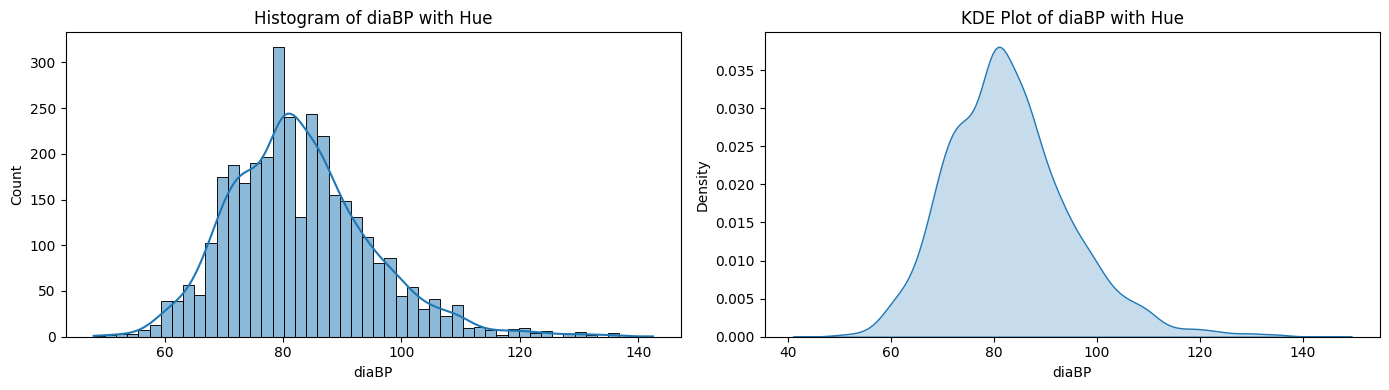

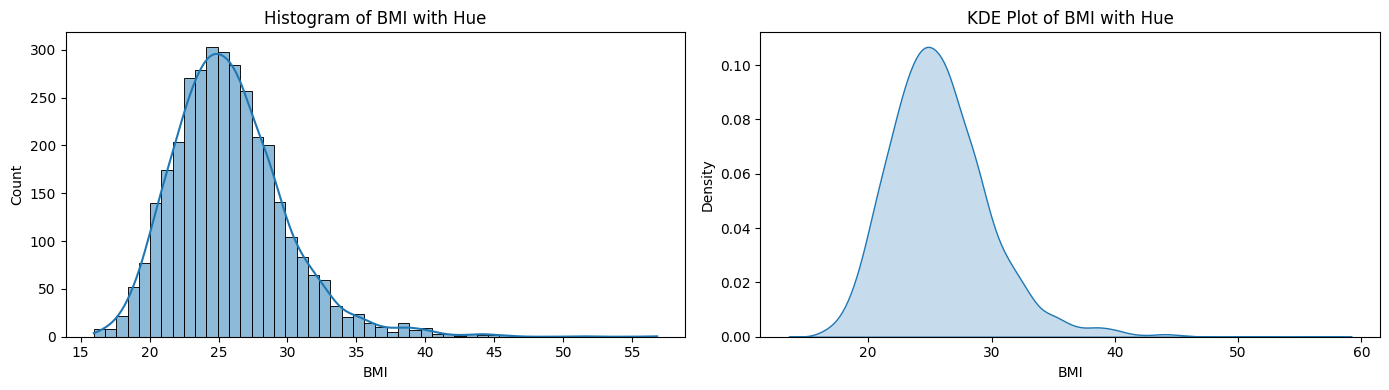

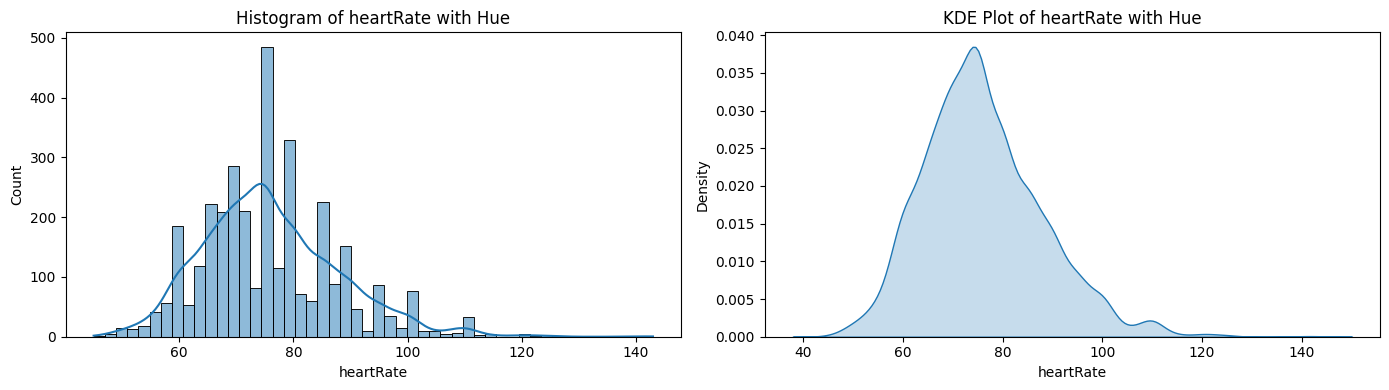

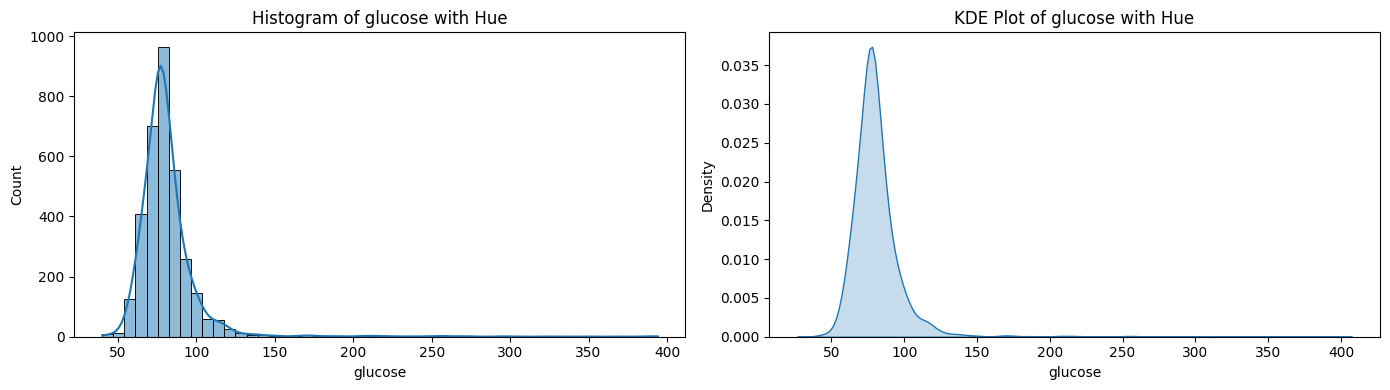

In [ ]:
# @title continous feature disturbutions
def target3_plot(column,train):

      axes = plt.subplots(1, 2, figsize=(14, 4))[1]  # Create subplots with 1 row and 2 columns

      # Plot histogram with hue
      sns.histplot(data=train, x=column, bins=50, kde=True, ax=axes[0])
      axes[0].set_title(f'Histogram of {column} with Hue')
      axes[0].set_xlabel(column)
      axes[0].set_ylabel('Count')

      # Plot KDE plot with hue
      sns.kdeplot(data=train, x=column, fill=True, ax=axes[1])
      axes[1].set_title(f'KDE Plot of {column} with Hue')
      axes[1].set_xlabel(column)
      axes[1].set_ylabel('Density')

      plt.tight_layout()  # Adjust spacing between subplots
      plt.show()
for i in cont:
 target3_plot(i,train)


<ipython-input-9-592ed214acb2>:8: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)


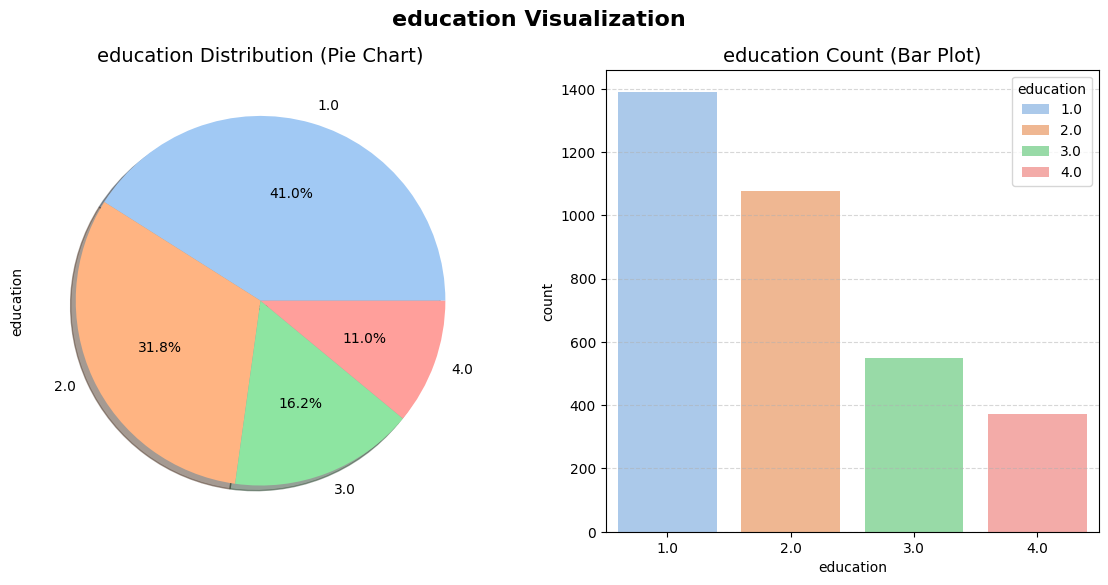

Columns in Target column are: education
1.0    1391
2.0    1077
3.0     549
4.0     373
Name: count, dtype: int64


<ipython-input-9-592ed214acb2>:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)


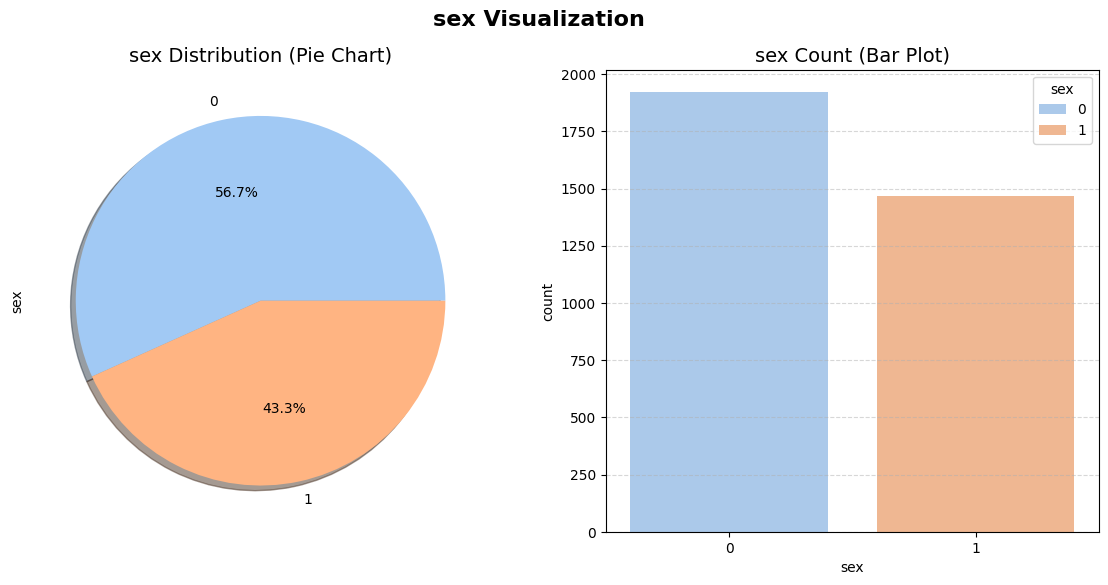

Columns in Target column are: sex
0    1923
1    1467
Name: count, dtype: int64


<ipython-input-9-592ed214acb2>:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)


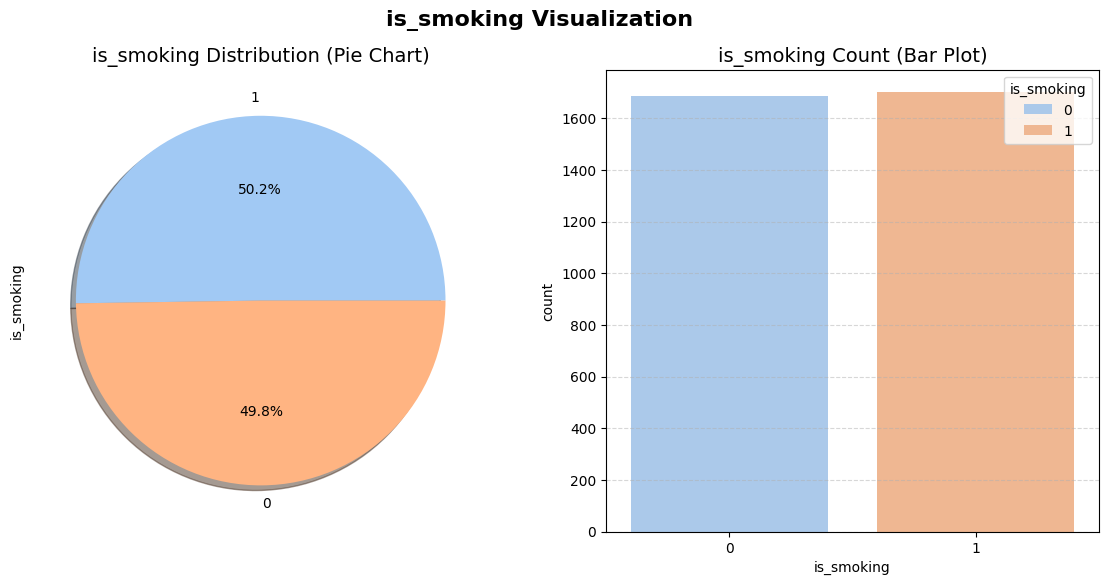

Columns in Target column are: is_smoking
1    1703
0    1687
Name: count, dtype: int64


<ipython-input-9-592ed214acb2>:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)


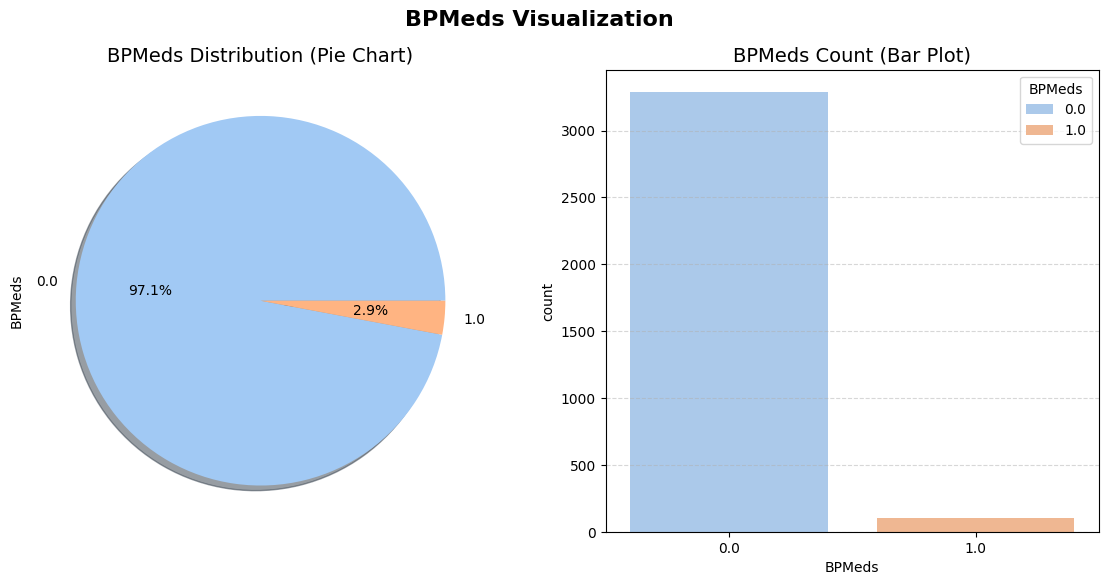

Columns in Target column are: BPMeds
0.0    3290
1.0     100
Name: count, dtype: int64


<ipython-input-9-592ed214acb2>:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)


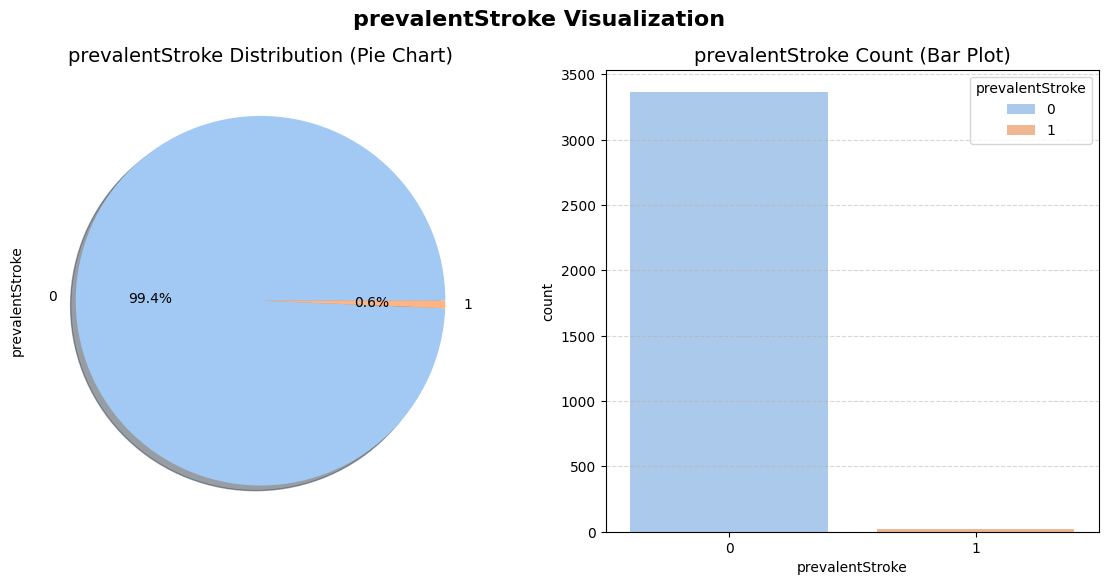

Columns in Target column are: prevalentStroke
0    3368
1      22
Name: count, dtype: int64


<ipython-input-9-592ed214acb2>:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)


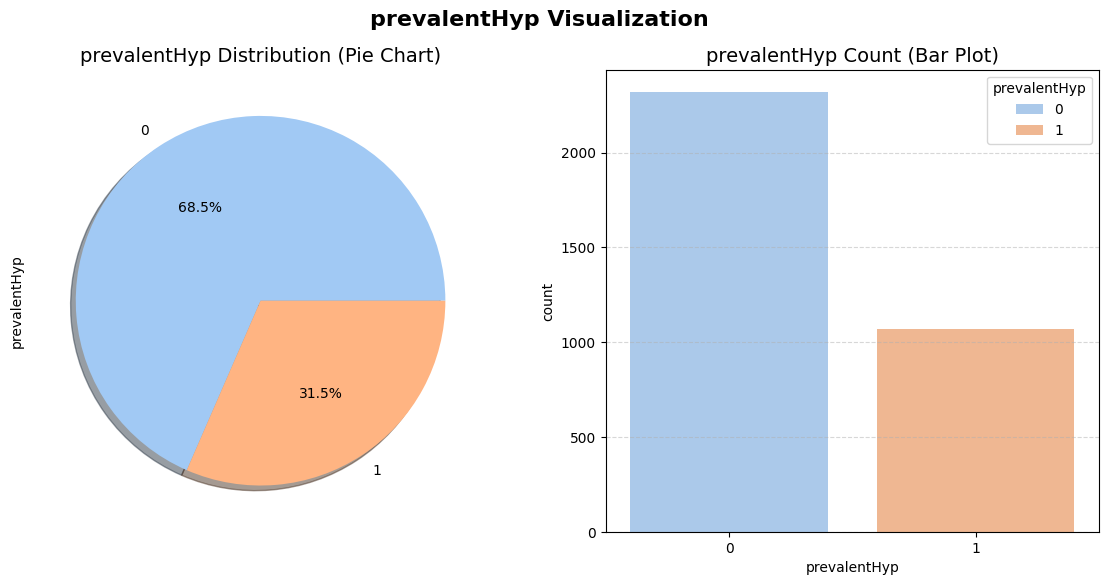

Columns in Target column are: prevalentHyp
0    2321
1    1069
Name: count, dtype: int64


<ipython-input-9-592ed214acb2>:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)


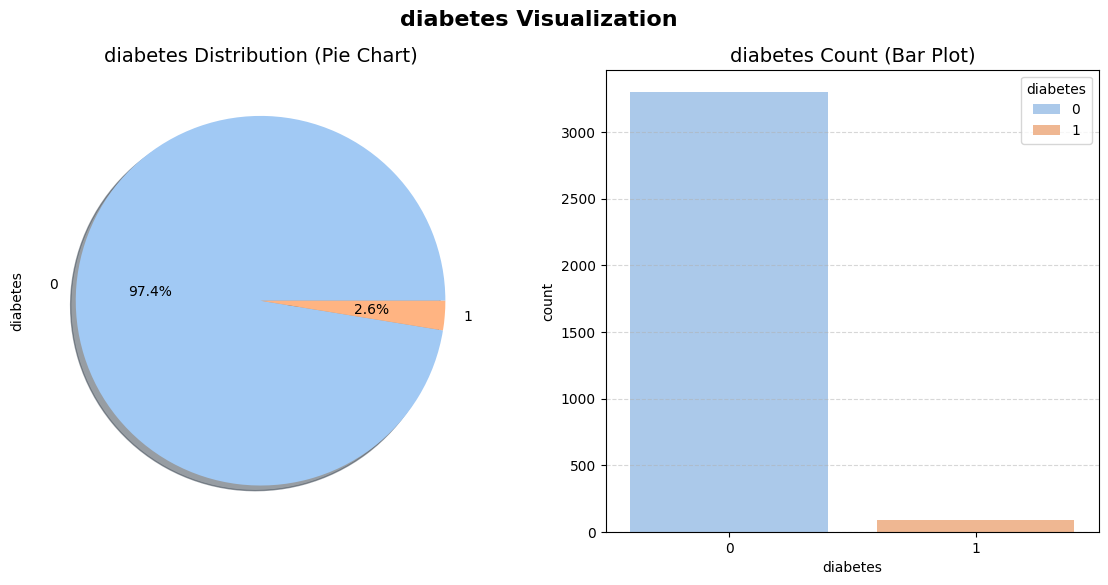

Columns in Target column are: diabetes
0    3303
1      87
Name: count, dtype: int64


<ipython-input-9-592ed214acb2>:8: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)


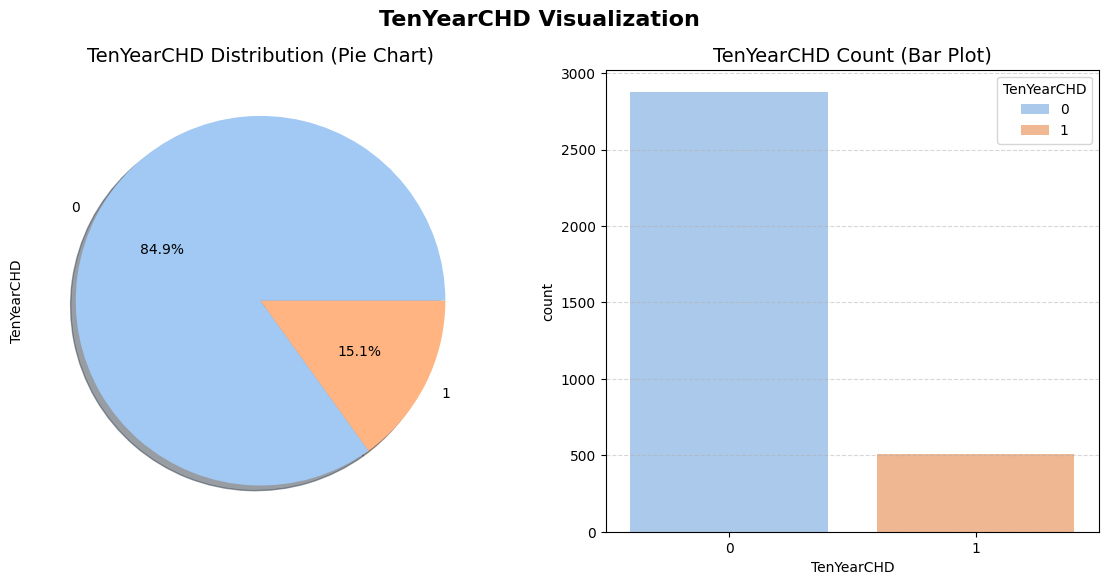

Columns in Target column are: TenYearCHD
0    2879
1     511
Name: count, dtype: int64


In [ ]:

# @title category feature disturbutions

def target_plot(column,train):
    custom_palette = sns.color_palette("pastel")
    f, ax = plt.subplots(1, 2, figsize=(14,6))
    train[column].value_counts().plot.pie(autopct='%2.1f%%', ax=ax[0], shadow=True, colors=custom_palette)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)
    ax[0].set_title(f'{column} Distribution (Pie Chart)', fontsize=14)
    ax[1].set_title(f'{column} Count (Bar Plot)', fontsize=14)
    plt.suptitle(f'{column} Visualization', fontsize=16, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    print("Columns in Target column are:",train[column].value_counts())
for i in cat:
 target_plot(i,train)

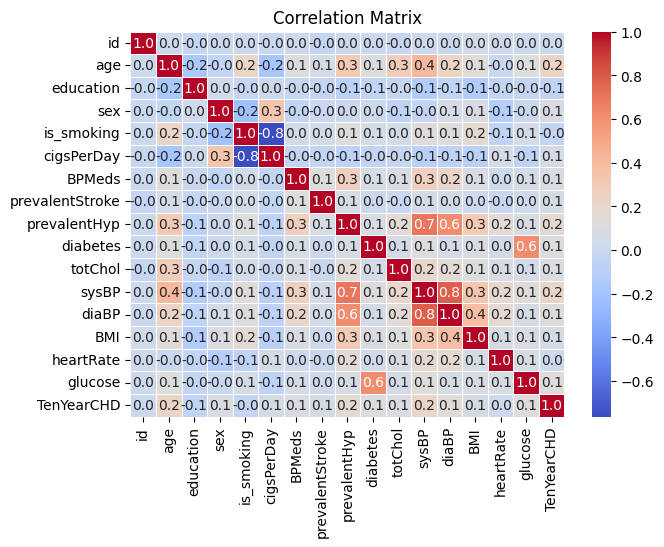

In [ ]:
  # @title Correlation Graph

# Calculate the correlation matrix for numerical columns
correlation_matrix = train.select_dtypes(exclude=['object']).corr()

# Set the size of the figure for better visualization
plt.figure(figsize=(7, 5))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Set the title of the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

In [ ]:
#spliting train dataset into input and ouput
y=train['TenYearCHD'].copy()

#droping highly correlated features
x=train.drop(['BPMeds','prevalentHyp','sysBP','TenYearCHD','id','is_smoking'],axis=1).copy()


In [ ]:
 # @title train test split
from sklearn.model_selection import train_test_split

xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.3,shuffle=True,stratify=y                              )

In [ ]:
# @title using *DescisionTree*

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

model.fit(xtr,ytr)
model.score(xte,yte)

0.7748279252704031

In [ ]:
# @title using *GaussianNB*

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

model.fit(xtr,ytr)
model.score(xte,yte)

0.8367748279252704

In [ ]:
# @title using *randomforest*

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=41,max_depth=12,max_features=10)
model.fit(xtr,ytr)
model.score(xte,yte)

0.8436578171091446

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
# @title using *xgboost*
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import optuna

def create(trial):
  params = {
          "min_child_weight":trial.suggest_int('min_child_weight',1,5),
          "max_depth": trial.suggest_int("max_depth", 5, 10),
          "gamma":trial.suggest_float('gamma',0,0.5),
          "learning_rate": trial.suggest_float("learning_rate", 1e-2, 0.2, log=True),
          "subsample": trial.suggest_float("subsample", 0.5, 1.0),
          "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
          "reg_alpha":trial.suggest_float('reg_alpha',0 ,5),
      }
  return params



model=XGBClassifier()

def objective(trial):


    params=create(trial)
    model.set_params(**params)
    cross = cross_val_score(model, xtr,ytr, n_jobs=-1).mean()
    return cross

optuna.logging.set_verbosity(optuna.logging.INFO)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-08-29 15:09:55,565] A new study created in memory with name: no-name-fdb9ef31-a2bf-4d19-a977-faf76fd712d9
[I 2024-08-29 15:10:04,338] Trial 0 finished with value: 0.8508221185876084 and parameters: {'min_child_weight': 4, 'max_depth': 5, 'gamma': 0.07411677067150974, 'learning_rate': 0.02719457606565868, 'subsample': 0.5791277678582154, 'colsample_bytree': 0.6947020384283611, 'reg_alpha': 1.332983548404569}. Best is trial 0 with value: 0.8508221185876084.
[I 2024-08-29 15:10:05,546] Trial 1 finished with value: 0.8377552742616035 and parameters: {'min_child_weight': 4, 'max_depth': 9, 'gamma': 0.39157731838348353, 'learning_rate': 0.1335911467728945, 'subsample': 0.7646543795947718, 'colsample_bytree': 0.9735573209976935, 'reg_alpha': 1.5601756986998694}. Best is trial 0 with value: 0.8508221185876084.
[I 2024-08-29 15:10:06,929] Trial 2 finished with value: 0.8491370197646013 and parameters: {'min_child_weight': 2, 'max_depth': 7, 'gamma': 0.09461309695112252, 'learning_rate':

Number of finished trials: 10
Best trial:
  Value: 0.8529309349322673
  Params: 
    min_child_weight: 5
    max_depth: 10
    gamma: 0.296700260064816
    learning_rate: 0.05240422916396907
    subsample: 0.890041541755046
    colsample_bytree: 0.7089559412772903
    reg_alpha: 1.8533800118752248


In [ ]:
best_params=study.best_params

model =XGBClassifier(**best_params)
model.fit(xtr,ytr)
model.score(xte,yte)

0.8475909537856441